In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

In [3]:
path = '~/Documents/dmproject/datasets/'

In [4]:
df = pd.read_csv(path + 'train.csv')

In [5]:
# Drop the id column, it' s not necessary to the classification task
df.drop(df.columns[0], axis=1, inplace=True)
df.drop(df.columns[6], axis=1, inplace=True)

In [6]:
df

,TotalItems,DistinctItems,MaxItems,Entropy,TotalSale,Frequency,customer_type
0,594,179,250,7.391510,375.37,210,high-spending
1,304,36,148,5.106603,125.22,42,medium-spending
2,768,71,224,6.080053,221.98,82,high-spending
3,354,98,95,6.446780,426.26,145,high-spending
4,96,11,96,3.459432,23.65,11,medium-spending
...,...,...,...,...,...,...,...
3316,270,24,146,4.546594,53.98,26,medium-spending
3317,10,1,10,1.000000,2.08,1,low-spending
3318,151,39,79,5.194236,108.81,48,medium-spending
3319,15,4,15,2.000000,17.10,4,low-spending


In [7]:
# label 0: high-spending
# label 1: medium-spending
# label 2: low-spending
df['customer_type'] = df['customer_type'].replace('high-spending', 0)
df['customer_type'] = df['customer_type'].replace('medium-spending', 1)
df['customer_type'] = df['customer_type'].replace('low-spending', 2)

In [8]:
y = df['customer_type']
X = df.drop(columns=['customer_type'])

## Try my Neural Network

In [9]:
from wavegrad.utility import *
from wavegrad.network import Sequential
from wavegrad.layers import LayerDense
from wavegrad.activations import *
from wavegrad.losses import MAE, MSE
from wavegrad.optimizers import *
from wavegrad.regularizer import L2
from keras.utils import np_utils

In [11]:
# X_train = X_train.values
# X_test = X_test.values

In [12]:
# y_train = np_utils.to_categorical(y_train)
# y_test = np_utils.to_categorical(y_test)
# y_train = y_train.values.reshape(y_train.shape[0], 1)
# y_test = y_test.values.reshape(y_test.shape[0], 1)

In [13]:
# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

In [14]:
# unskew the data
# rfm_log = df[['TotalSale', 'TotalItems', 'DistinctItems', 'MaxItems', 'Entropy', 'Frequency']].apply(np.log, axis = 1).round(3)
rfm_log = df[['DistinctItems', 'MaxItems', 'Entropy', 'Frequency']].apply(np.log, axis = 1).round(3)
# df = df[['DistinctItems', 'MaxItems', 'Entropy', 'Frequency']]

In [15]:
from sklearn.preprocessing import StandardScaler

# scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(rfm_log)# transform into a dataframe
df_scaled = pd.DataFrame(df_scaled, index = rfm_log.index, columns = rfm_log.columns)

In [20]:
X_train = df_scaled.values
y_train = y.values

In [21]:
y_train = np_utils.to_categorical(y_train)

In [22]:
print(X_train.shape)
print(y_train.shape)

(3321, 4)
(3321, 3)


In [24]:
# # Network
net = Sequential()
net.add(LayerDense(4, 10, relu))
net.add(LayerDense(10, 3, sigmoid))

reg = L2(l2=0.001)
optim = GD(net.layers, lr=0.001, momentum=0.6)
net.use(MSE)
net.fit(X_train, y_train, epochs=200, optimizer=optim, validation_split=0.2, regularizer=reg)

epoch 200/200   error=0.04    accuracy=0.94    val_error=0.05    val_acc=0.94: 100%|██████████| 200/200 [00:52<00:00,  3.82it/s]


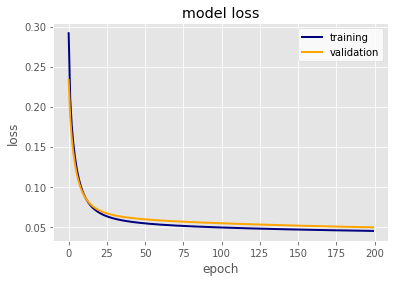

In [104]:
plot_loss(net)

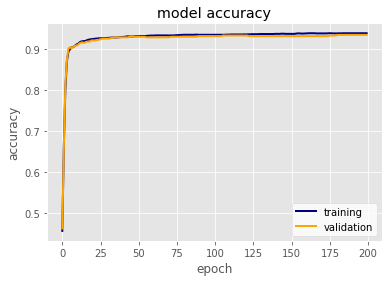

In [105]:
plot_accuracy(net)

In [95]:
test = pd.read_csv(path + 'test.csv')

In [96]:
# Drop the id column, it' s not necessary to the classification task
test.drop(test.columns[0], axis=1, inplace=True)
test.drop(test.columns[6], axis=1, inplace=True)

In [97]:
rfm_log = test[['DistinctItems', 'MaxItems', 'Entropy', 'Frequency']].apply(np.log, axis = 1).round(3)

In [98]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(rfm_log)# transform into a dataframe
df_scaled = pd.DataFrame(df_scaled, index = rfm_log.index, columns = rfm_log.columns)

In [99]:
# label 0: high-spending
# label 1: medium-spending
# label 2: low-spending
test['customer_type'] = test['customer_type'].replace('high-spending', 0)
test['customer_type'] = test['customer_type'].replace('medium-spending', 1)
test['customer_type'] = test['customer_type'].replace('low-spending', 2)

In [100]:
y = test['customer_type']

In [101]:
# y = test['customer_type']
# X = test.drop(columns=['customer_type','TotalItems','TotalSale'])

In [102]:
X_test = df_scaled.values
y_test = np_utils.to_categorical(y)

In [103]:
# Test set accuracy on test set.
out = net.predict(X_test)
accuracy(y_test, out)

0.9314079422382672